# # Fashion MNIST 데이터셋을 활용한 의류(0~9) 예측하는 다중 분류

## 데이터 준비하기

In [1]:
from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train.shape (60000, 28, 28)
X_test.shape (10000, 28, 28)


## MNIST 데이터 형태 확인하기

### 훈련 데이터셋

In [2]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_train ', y_train)

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
y_train  [9 0 0 ... 3 0 5]


In [3]:
print(X_train[1]) # 범위가 0~255 사이인 것 확인

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

### 테스트 데이터셋

In [4]:
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)
print('y_test ', y_test)

X_test.shape :  (10000, 28, 28)
y_test.shape :  (10000,)
y_test  [9 2 1 ... 8 1 5]


## 데이터 그려보기

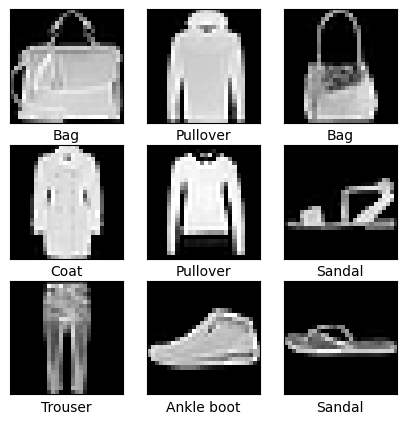

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7) # numpy random seed 고정

# 0~9 레이블 정보 저장 (각 레이블마다 다른 의류의 사진이 들어있음)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0~59999의 범위 내에서 무작위로 정수 9개 추출
random_idx = np.random.randint(60000, size = sample_size) # 60000(0~59999)개의 숫자 중 무작위로 9개 추출

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx) :
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.xlabel(class_names[y_train[idx]])

plt.show()

## 데이터 전처리

1.   데이터(문제) : 스케일링 (0~1 사이로 범위 축소)
2.   레이블(정답) : 범주형으로 변경



In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### 데이터(문제) : 스케일링 (0~1 사이로 범위 축소)

In [7]:
# 범위가 0~255였던 데이터를 minmax 알고리즘을 사용하여 0~1 사이로 범위 축소
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### 레이블(정답) : 범주형으로 변경

In [8]:
from keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('real_y_test', real_y_test[0]) # 숫자 9가
print('y_test', y_test[0]) # 범주형으로 변환됨

real_y_test 9
y_test [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [9]:
from sklearn.model_selection import train_test_split

# 훈련셋 (70%), 검증셋 (30%)으로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 7)

In [10]:
print('X_train.shape', X_train.shape)
print('X_val.shape', X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


## 첫 번째 모델 구성

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()

# Flatten(28, 28) → (28 * 28) → 1차원 784로 변환 : reshape으로 데이터를 수정하지 않고도 2차원을 1차원으로 펼쳐줌
first_model.add(Flatten(input_shape = (28, 28))) # 입력층
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax')) # 출력층 : 10개로 최종 출력

## 첫 번째 모델 설정하기

In [12]:
first_model.compile(optimizer = 'adam', # optimizer : 가중치 계산
              loss = 'categorical_crossentropy', # loss : 손실함수 (채점 선생님)
              metrics = ['acc']) # 모니터링할 평가 지표

## 첫 번째 모델 학습하기

In [13]:
first_history = first_model.fit(X_train, y_train,
                epochs = 30,
                batch_size = 128,
                validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 7s 14ms/step - loss: 0.6535 - acc: 0.7779 - val_loss: 0.4513 - val_acc: 0.8393
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4372 - acc: 0.8448 - val_loss: 0.5017 - val_acc: 0.8062
Epoch 3/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3983 - acc: 0.8601 - val_loss: 0.3815 - val_acc: 0.8649
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3735 - acc: 0.8670 - val_loss: 0.3865 - val_acc: 0.8578
Epoch 5/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3519 - acc: 0.8743 - val_loss: 0.3674 - val_acc: 0.8687
Epoch 6/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3396 - acc: 0.8781 - val_loss: 0.3702 - val_acc: 0.8669
Epoch 7/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3255 - acc: 0.8818 - val_loss: 0.3564 - val_acc: 0.8723
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - loss:

## 두 번째 모델 구성 및 학습하기

In [14]:
# 모델 구성하기
second_model = Sequential()

# Flatten(28, 28) → (28 * 28) → 1차원 784로 변환 : reshape으로 데이터를 수정하지 않고도 2차원을 1차원으로 펼쳐줌
second_model.add(Flatten(input_shape = (28, 28))) # 입력층
second_model.add(Dense(128, activation = 'relu')) # 첫 번째 모델보다 층 하나 더 추가
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax')) # 출력층 : 10개로 최종 출력

# 모델 설정하기
second_model.compile(optimizer = 'adam', # optimizer : 가중치 계산
              loss = 'categorical_crossentropy', # loss : 손실함수 (채점 선생님)
              metrics = ['acc']) # 모니터링할 평가 지표

# 모델 학습하기
second_history = second_model.fit(X_train, y_train,
                epochs = 30,
                batch_size = 128,
                validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6502 - acc: 0.7738 - val_loss: 0.4662 - val_acc: 0.8359
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4233 - acc: 0.8490 - val_loss: 0.3792 - val_acc: 0.8688
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3801 - acc: 0.8641 - val_loss: 0.3653 - val_acc: 0.8713
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3515 - acc: 0.8726 - val_loss: 0.3662 - val_acc: 0.8692
Epoch 5/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3302 - acc: 0.8798 - val_loss: 0.3962 - val_acc: 0.8597
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3130 - acc: 0.8852 - val_loss: 0.3468 - val_acc: 0.8755
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2958 - acc: 0.8922 - val_loss: 0.3308 - val_acc: 0.8812
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

## 모델 학습 결과 분석

*   두 모델 모두 과대적합의 경향이 있음
*   첫 번째 모델은 epoch = 12 이후부터 손실 값이 상승하고, 훈련 정확도와 검증 정확도의 차이가 발생함 → epoch = 12까지 학습시킨 후 평가
*   두 번째 모델은 epoch = 10 이후부터 손실 값이 상승하고, 훈련 정확도와 검증 정확도의 차이가 발생함 → epoch = 10까지 학습시킨 후 평가



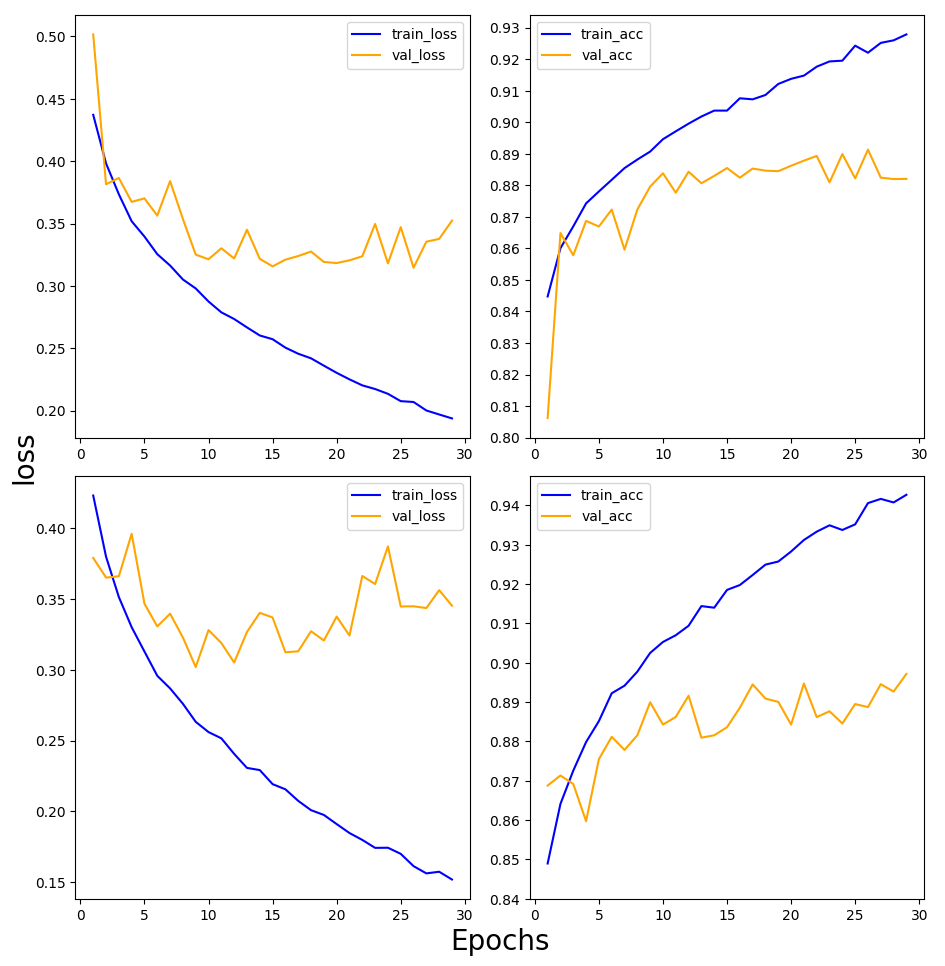

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)

# 결과 해석
# 두 모델 모두 과대적합되었으나, 첫 번째 모델보다 두 번째 모델이 과대적합되었음을 확인 가능
# val_acc가 가장 높은 수준으로 에포크의 값을 조정
# 층이 깊을수록 층이 얕은 모델보다 작은 값의 에포크가 최적의 값임

## 모델 성능 평가 비교

In [16]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3940 - acc: 0.8899


[0.39398193359375, 0.8899000287055969]

## 혼동 행렬

*   첫 번째 모델 : 0(T-shirt/top), 2(Pullover), 6(Shirt) → 정확도 낮음 → 데이터를 추가 수집하여 추가 학습 필요
*   두 번째 모델 : 6(Shirt) → 정확도 낮음 → 데이터를 추가 수집하여 추가 학습 필요 </br>(특히 유독 6과 0을 헷갈리고 있음)



In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

313/313 [==============================] - 1s 2ms/step


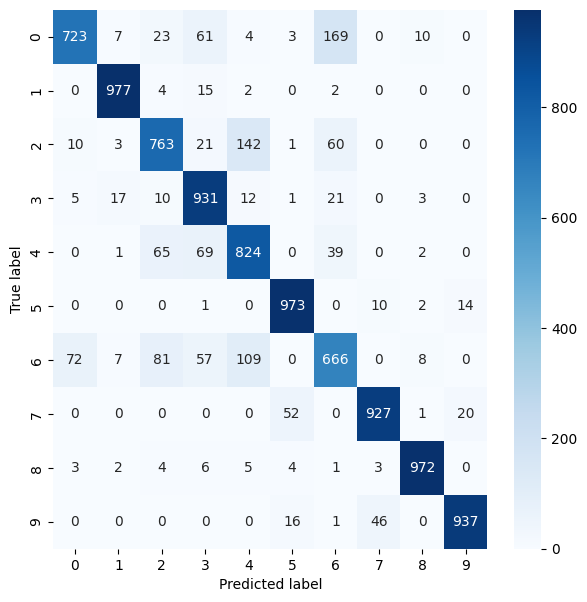

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = first_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

# 혼동 행렬을 히트맵으로 그리기
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

313/313 [==============================] - 1s 2ms/step


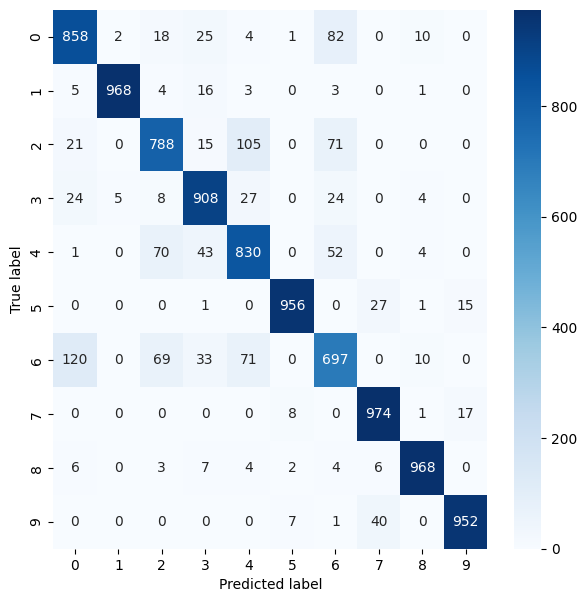

In [19]:
# 모델 예측
y_pred = second_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

# 혼동 행렬을 히트맵으로 그리기
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 모델 예측해서 그려보기

313/313 [==============================] - 0s 1ms/step


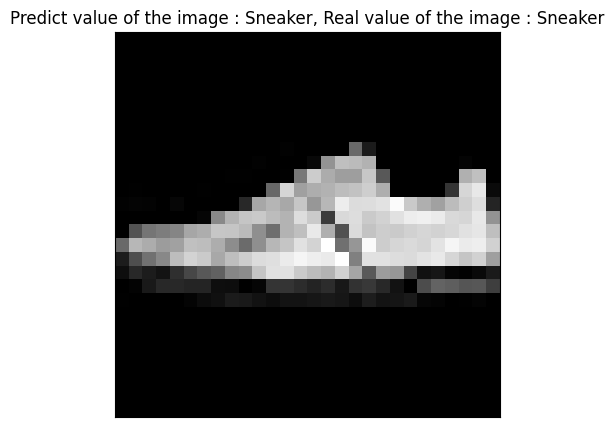

In [20]:
results = first_model.predict(X_test)
arg_results = np.argmax(results, axis = 1)

random_idx = np.random.randint(10000)

plt.figure(figsize = (5, 5), dpi = 100)
plt.xticks([]) # 눈금 제거하기
plt.yticks([])
plt.imshow(X_test[random_idx], cmap = 'gray')
plt.title('Predict value of the image : ' + class_names[arg_results[random_idx]] + # 예측 정답
          ', Real value of the image : ' + class_names[real_y_test[random_idx]]) # 실제 정답
plt.show()

## 세 번째 모델 구성
*   [256, 128, 64, 32, 10] 5개의 레이어로 모델 구성
*   모델 설정, 학습 이전 모델과 동일하게 설정
*   모델 학습 후 history 변수에 담아 결과 분석
*   모델 성능 평가(evaluate(), 혼동 행렬) 그리고 향후 발전 방향 수립
*   수요일에 랜덤하게 2팀 뽑아서 발표




### 모델 구성하기

In [21]:
third_model = Sequential()

# Flatten(28, 28) → (28 * 28) → 1차원 784로 변환 : reshape으로 데이터를 수정하지 않고도 2차원을 1차원으로 펼쳐줌
third_model.add(Flatten(input_shape = (28, 28))) # 입력층
third_model.add(Dense(256, activation = 'relu')) # 첫 번째 모델보다 층 두 개 더 추가
third_model.add(Dense(128, activation = 'relu'))
third_model.add(Dense(64, activation = 'relu'))
third_model.add(Dense(32, activation = 'relu'))
third_model.add(Dense(10, activation = 'softmax')) # 출력층 : 10개로 최종 출력

### 모델 설정하기

In [22]:
third_model.compile(optimizer = 'adam', # optimizer : 가중치 계산
              loss = 'categorical_crossentropy', # loss : 손실함수 (채점 선생님)
              metrics = ['acc']) # 모니터링할 평가 지표

### 모델 학습하기

In [23]:
# 모델 학습하기
third_history = third_model.fit(X_train, y_train,
                epochs = 30,
                batch_size = 128,
                validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 4s 9ms/step - loss: 0.6249 - acc: 0.7849 - val_loss: 0.4718 - val_acc: 0.8323
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4160 - acc: 0.8537 - val_loss: 0.4086 - val_acc: 0.8511
Epoch 3/30
329/329 [==============================] - 4s 12ms/step - loss: 0.3628 - acc: 0.8681 - val_loss: 0.3456 - val_acc: 0.8744
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3329 - acc: 0.8769 - val_loss: 0.3596 - val_acc: 0.8687
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3116 - acc: 0.8843 - val_loss: 0.3475 - val_acc: 0.8715
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.2980 - acc: 0.8901 - val_loss: 0.3245 - val_acc: 0.8821
Epoch 7/30
329/329 [==============================] - 4s 12ms/step - loss: 0.2798 - acc: 0.8959 - val_loss: 0.3255 - val_acc: 0.8793
Epoch 8/30
329/329 [==============================] - 3s 9ms/step - loss:

### 모델 학습 결과 분석

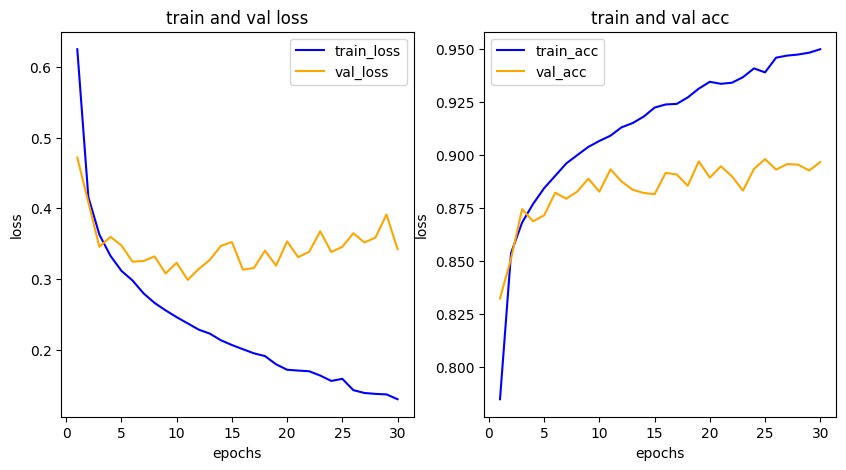

In [24]:
import matplotlib.pyplot as plt

his_dict = third_history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### 그래프 해석

*   층이 깊은 모델은 층이 얕은 모델보다 에포크 값을 줄여주는 게 좋다고 배웠음
*   가장 층이 얕은 첫 번째 모델은 epoch = 12 이후, 두 번째 모델은 epoch = 10 이후에 검증셋의 손실 값이 높아지고 훈련셋과 검증셋의 정확도 차이가 벌어지고 있는 것과 달리 </br>가장 층이 깊은 세 번째 모델은 epoch = 5 이후에 검증셋의 손실 값이 높아지고 훈련셋과 검증셋의 정확도 차이가 크게 벌어지고 있음
*   따라서, 가장 층이 깊은 세 번째 모델의 경우 epoch = 5까지 학습시키는 것이 최적점



In [29]:
# 세 번째 모델의 epoch를 5로 수정하여 학습한 결과
# 모델 구성하기
third_5_model = Sequential()

# Flatten(28, 28) → (28 * 28) → 1차원 784로 변환 : reshape으로 데이터를 수정하지 않고도 2차원을 1차원으로 펼쳐줌
third_5_model.add(Flatten(input_shape = (28, 28))) # 입력층
third_5_model.add(Dense(256, activation = 'relu')) # 첫 번째 모델보다 층 두 개 더 추가
third_5_model.add(Dense(128, activation = 'relu'))
third_5_model.add(Dense(64, activation = 'relu'))
third_5_model.add(Dense(32, activation = 'relu'))
third_5_model.add(Dense(10, activation = 'softmax')) # 출력층 : 10개로 최종 출력

# 모델 설정하기
third_5_model.compile(optimizer = 'adam', # optimizer : 가중치 계산
              loss = 'categorical_crossentropy', # loss : 손실함수 (채점 선생님)
              metrics = ['acc']) # 모니터링할 평가 지표

# 모델 학습하기
third_5_history = third_5_model.fit(X_train, y_train,
                epochs = 5,
                batch_size = 128,
                validation_data = (X_val, y_val))

Epoch 1/5
329/329 [==============================] - 5s 11ms/step - loss: 0.6059 - acc: 0.7873 - val_loss: 0.4213 - val_acc: 0.8498
Epoch 2/5
329/329 [==============================] - 4s 11ms/step - loss: 0.4049 - acc: 0.8547 - val_loss: 0.3884 - val_acc: 0.8599
Epoch 3/5
329/329 [==============================] - 4s 12ms/step - loss: 0.3612 - acc: 0.8679 - val_loss: 0.3544 - val_acc: 0.8718
Epoch 4/5
329/329 [==============================] - 3s 9ms/step - loss: 0.3321 - acc: 0.8791 - val_loss: 0.3394 - val_acc: 0.8766
Epoch 5/5
329/329 [==============================] - 3s 9ms/step - loss: 0.3130 - acc: 0.8843 - val_loss: 0.3148 - val_acc: 0.8857


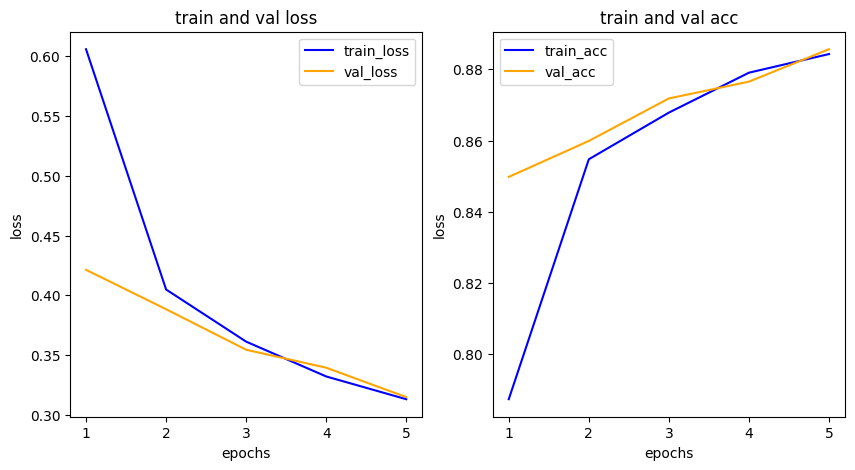

In [30]:
import matplotlib.pyplot as plt

his_dict = third_5_history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

# 세 번째 모델의 epoch를 5로 설정해서 학습시키고 그래프를 그려봤을 때, 손실 값도 최저이고 훈련셋과 검증셋의 정확도 차이도 벌어지지 않았음을 확인 가능함

### 모델 성능 평가 - evaluate()

In [26]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)
third_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3924 - acc: 0.8873


[0.39237579703330994, 0.8873000144958496]

### 모델 성능 평가 - 혼동 행렬

313/313 [==============================] - 2s 5ms/step


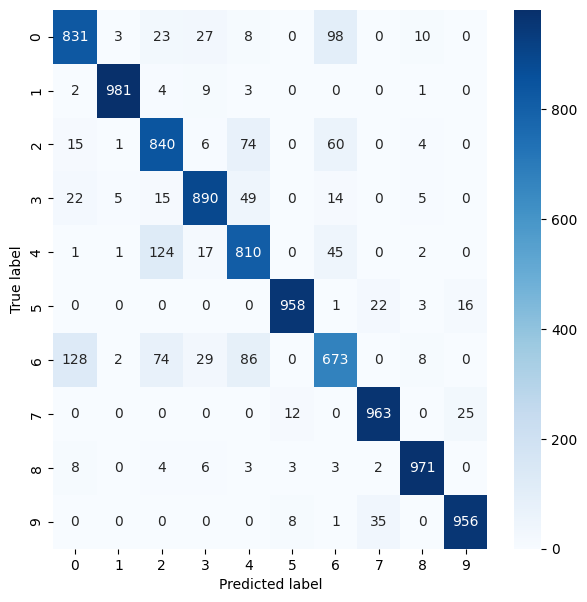

In [27]:
# 모델 예측
y_pred = third_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

# 혼동 행렬을 히트맵으로 그리기
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### 결과 해석
| **Index** |   **Clothes**   |
|-----------|:---------------:|
|   **0**   | **T-shirt/top** |
|   **1**   |   **Trouser**   |
|   **2**   |   **Pullover**  |
|   **3**   |    **Dress**    |
|   **4**   |     **Coat**    |
|   **5**   |    **Sandal**   |
|   **6**   |    **Shirt**    |
|   **7**   |   **Sneaker**   |
|   **8**   |     **Bag**     |
|   **9**   |  **Ankle boot** |

*   6번(Shirt)을 압도적으로 많이 헷갈리고 있는데, 0번(T-shirt/top), 2번(Pullover), 4번(Coat)과 헷갈리고 있음
*   향후 특히 많이 헷갈리고 있는 0번(T-shirt/top)과 유사한 6번(Shirt) 이미지를 수집하여 재학습시키는 게 바람직함

